<a href="https://colab.research.google.com/github/GunroarCannon/yahoo-finance-visualization-test/blob/main/yfinance_visualization_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00
✅ All libraries loaded! Let's roll!
📊 Downloading data for ['AAPL', 'TSLA', 'SPY', 'QQQ']...


[*********************100%***********************]  4 of 4 completed


✅ Data downloaded!
Data shape: (501, 20)
Ticker             QQQ                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2023-10-23  348.970305  354.897446  346.856277  351.351044  60665200   
2023-10-24  353.168689  355.539540  351.469574  354.769012  47082100   
2023-10-25  352.368539  352.546346  345.502922  346.085754  71190500   
2023-10-26  344.880567  345.819043  338.192787  339.486877  78621400   
2023-10-27  342.223216  344.603955  339.901747  341.116821  63476700   

Ticker             SPY                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2023-10-23  409.038626  413.756717  407.274229  409.867218   92035100   
2023-10-24  412.002015  414.117359  410.140131  412.957336   78564200   
2023-10-25  411.2

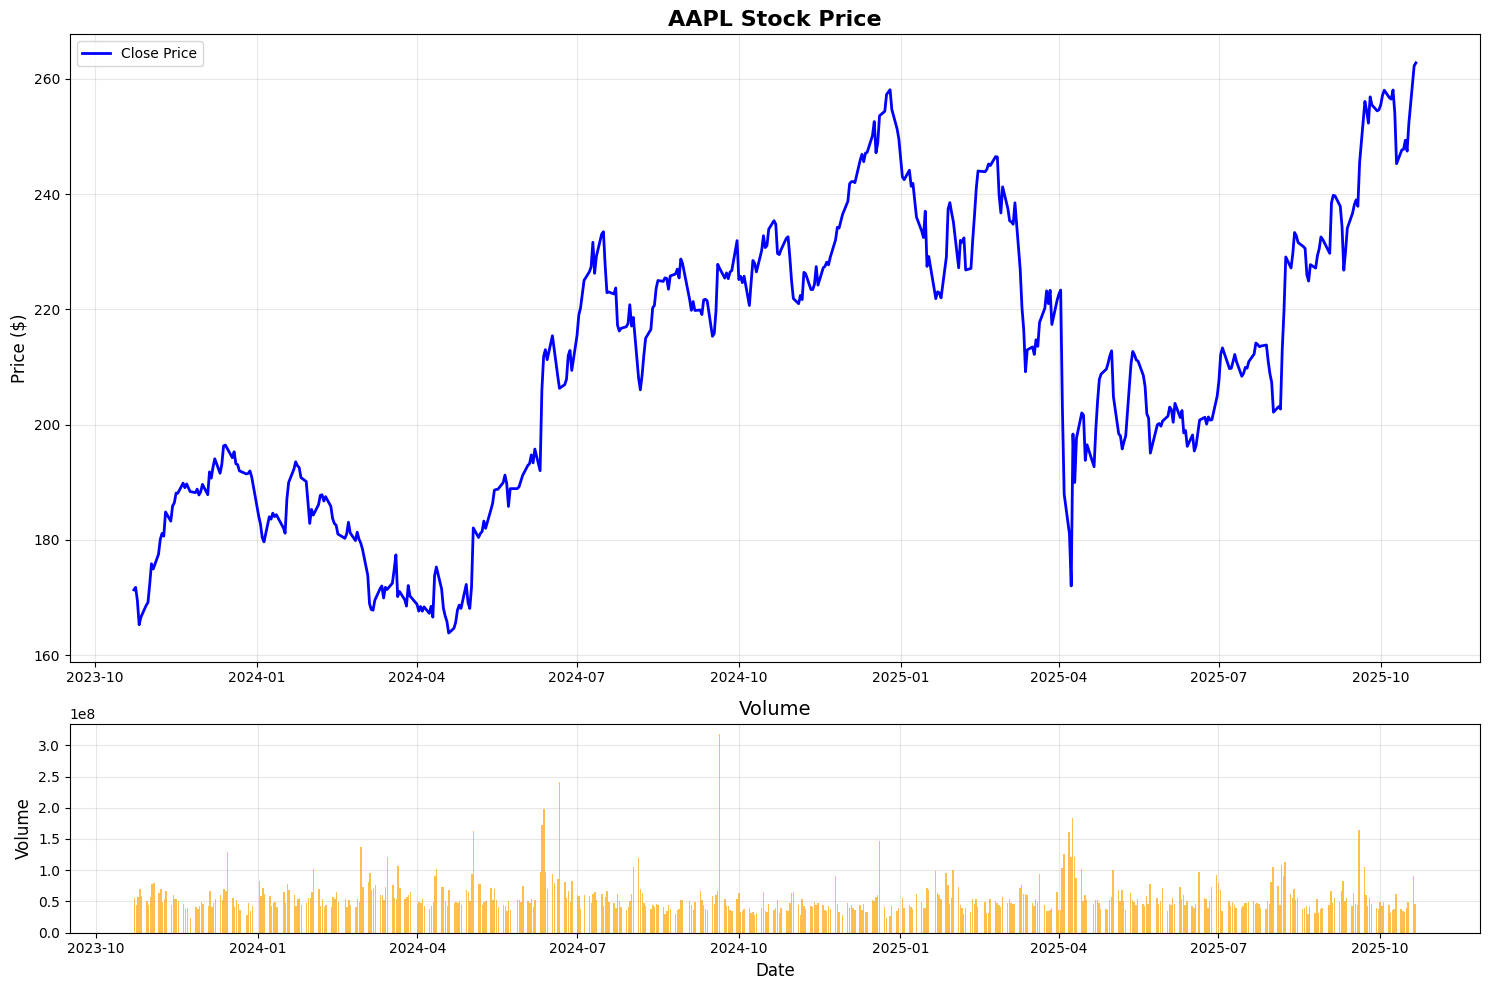

✅ Technical indicators calculated!


In [1]:

# %% [markdown]
# # 🚀 ULTRA-FAST TRADING VISUALIZATION SPRINT
# ### Complete in 5 Hours - Colab Edition
#

# %% [code]
# INSTALL EVERYTHING WE NEED
!pip install yfinance plotly seaborn mplfinance ta -q

# IMPORT ALL LIBRARIES
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import mplfinance as mpf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries loaded! Let's roll!")

# %% [code]
# FETCH DATA - MULTIPLE TICKERS
def fetch_data(tickers, period='2y'):
    print(f"📊 Downloading data for {tickers}...")
    data = yf.download(tickers, period=period, group_by='ticker')
    return data

# TICKERS TO ANALYZE
tickers = ['AAPL', 'TSLA', 'SPY', 'QQQ']
data = fetch_data(tickers)

print("✅ Data downloaded!")
print(f"Data shape: {data.shape}")
print(data.head())

# %% [code]
# TASK 1.1: BASIC PRICE VISUALIZATIONS - AAPL ONLY
aapl_data = data['AAPL'].copy()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10),
                               gridspec_kw={'height_ratios': [3, 1]})

# Price chart
ax1.plot(aapl_data.index, aapl_data['Close'], label='Close Price', linewidth=2, color='blue')
ax1.set_title('AAPL Stock Price', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Volume chart
ax2.bar(aapl_data.index, aapl_data['Volume'], color='orange', alpha=0.7)
ax2.set_title('Volume', fontsize=14)
ax2.set_ylabel('Volume', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [code]
# TASK 1.2: TECHNICAL INDICATORS - QUICK CALCULATIONS
def calculate_indicators(df):
    df = df.copy()
    # Moving averages
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    # RSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    exp1 = df['Close'].ewm(span=12).mean()
    exp2 = df['Close'].ewm(span=26).mean()
    df['MACD'] = exp1 - exp2
    df['MACD_Signal'] = df['MACD'].ewm(span=9).mean()

    return df

aapl_tech = calculate_indicators(aapl_data)

print("✅ Technical indicators calculated!")

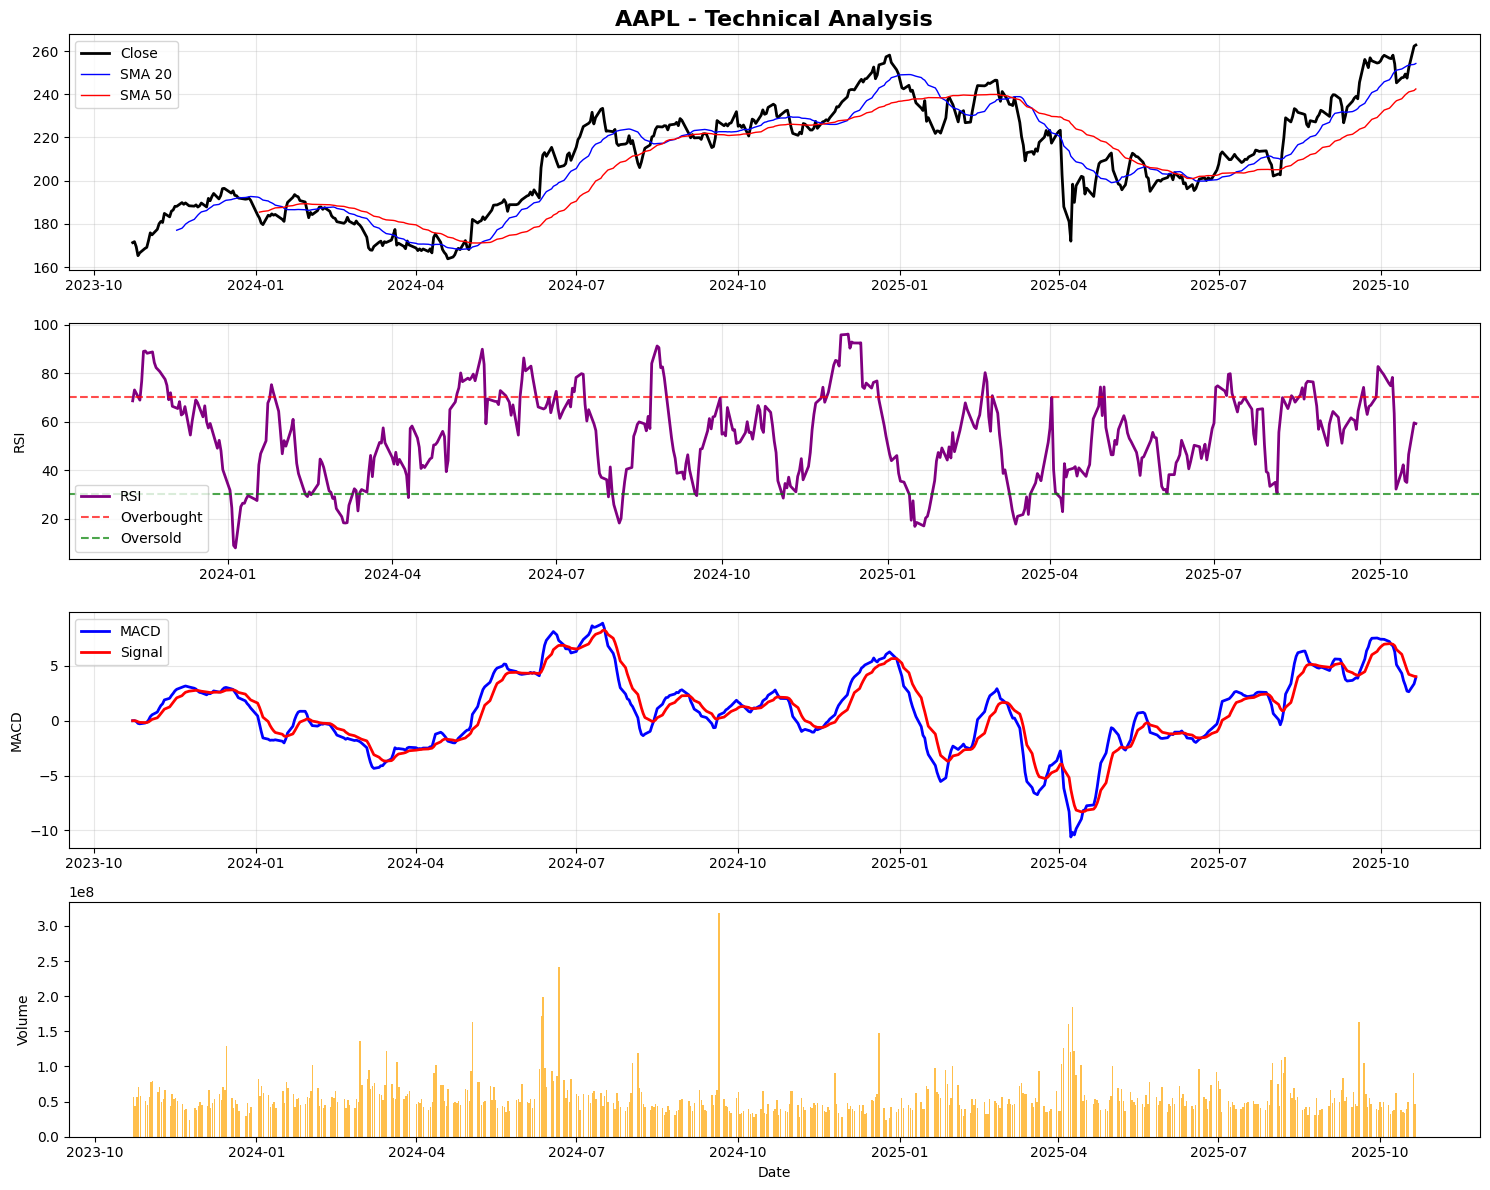

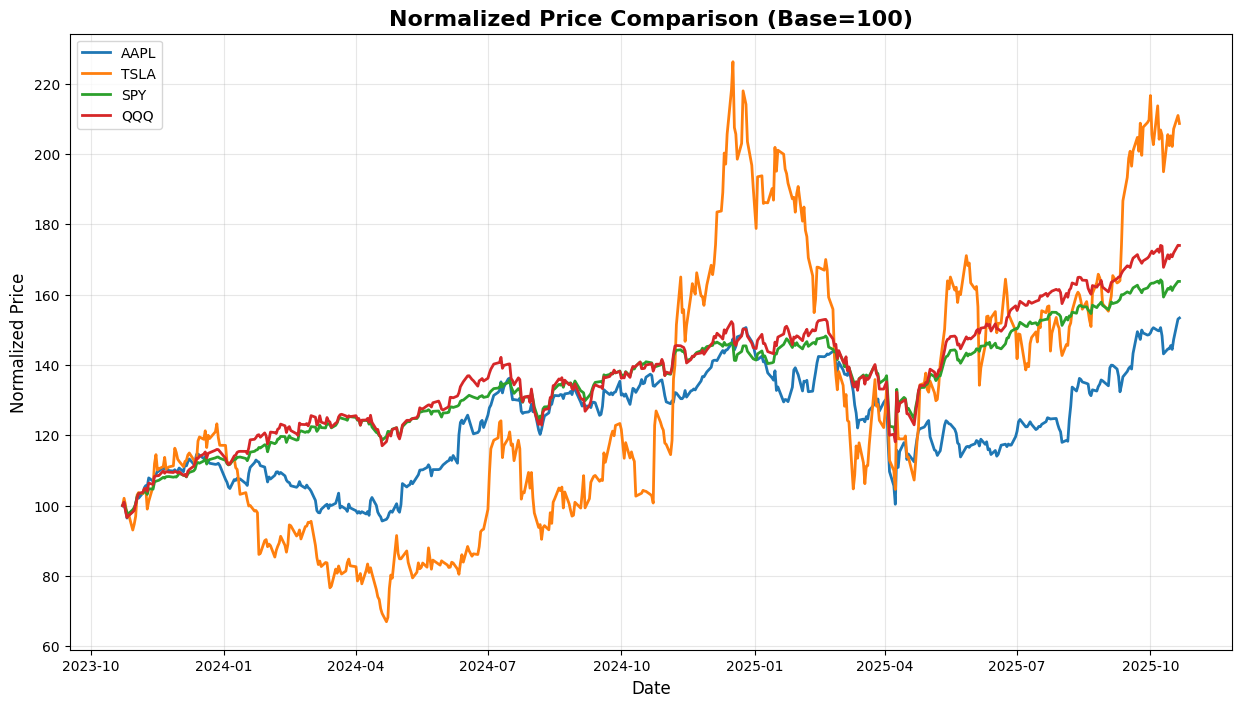

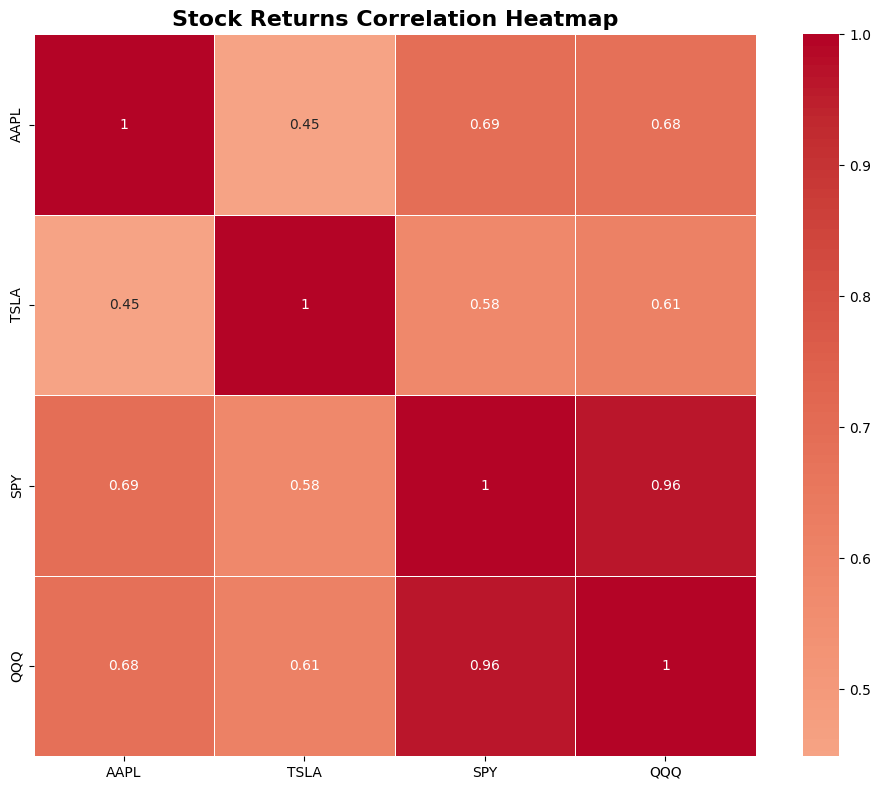

✅ Task 1 COMPLETE! Moving to interactive dashboards...


In [2]:
# %% [code]
# TASK 1.3: COMPREHENSIVE TECHNICAL CHART
fig = plt.figure(figsize=(15, 12))

# Price + MAs
ax1 = plt.subplot(4, 1, 1)
ax1.plot(aapl_tech.index, aapl_tech['Close'], label='Close', linewidth=2, color='black')
ax1.plot(aapl_tech.index, aapl_tech['SMA_20'], label='SMA 20', linewidth=1, color='blue')
ax1.plot(aapl_tech.index, aapl_tech['SMA_50'], label='SMA 50', linewidth=1, color='red')
ax1.set_title('AAPL - Technical Analysis', fontsize=16, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# RSI
ax2 = plt.subplot(4, 1, 2)
ax2.plot(aapl_tech.index, aapl_tech['RSI'], label='RSI', linewidth=2, color='purple')
ax2.axhline(70, color='r', linestyle='--', alpha=0.7, label='Overbought')
ax2.axhline(30, color='g', linestyle='--', alpha=0.7, label='Oversold')
ax2.set_ylabel('RSI')
ax2.legend()
ax2.grid(True, alpha=0.3)

# MACD
ax3 = plt.subplot(4, 1, 3)
ax3.plot(aapl_tech.index, aapl_tech['MACD'], label='MACD', linewidth=2, color='blue')
ax3.plot(aapl_tech.index, aapl_tech['MACD_Signal'], label='Signal', linewidth=2, color='red')
ax3.set_ylabel('MACD')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Volume
ax4 = plt.subplot(4, 1, 4)
ax4.bar(aapl_tech.index, aapl_tech['Volume'], color='orange', alpha=0.7)
ax4.set_ylabel('Volume')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

# %% [code]
# TASK 1.4: MULTIPLE ASSET COMPARISON
# Normalized price comparison
plt.figure(figsize=(15, 8))

for ticker in tickers:
    price_data = data[ticker]['Close']
    normalized_price = (price_data / price_data.iloc[0]) * 100  # Start at 100
    plt.plot(normalized_price.index, normalized_price, label=ticker, linewidth=2)

plt.title('Normalized Price Comparison (Base=100)', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# %% [code]
# CORRELATION HEATMAP
returns_data = pd.DataFrame()

for ticker in tickers:
    returns_data[ticker] = data[ticker]['Close'].pct_change()

# Calculate correlation matrix
correlation_matrix = returns_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Stock Returns Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Task 1 COMPLETE! Moving to interactive dashboards...")

In [4]:

# %% [code]
# TASK 2: INTERACTIVE PLOTLY DASHBOARD
def create_interactive_dashboard(ticker_data, ticker_name):
    df = ticker_data.copy()
    df = calculate_indicators(df)  # Use our function from before

    # Create subplots
    fig = make_subplots(rows=4, cols=1,
                       shared_xaxes=True,
                       vertical_spacing=0.05,
                       subplot_titles=[f'{ticker_name} Price with Moving Averages',
                                      'RSI', 'MACD', 'Volume'],
                       row_heights=[0.4, 0.2, 0.2, 0.2])

    # Price with MAs
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'],
                            name='Close', line=dict(color='black', width=2)),
                 row=1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['SMA_20'],
                            name='SMA 20', line=dict(color='blue', width=1)),
                 row=1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['SMA_50'],
                            name='SMA 50', line=dict(color='red', width=1)),
                 row=1, col=1)

    # RSI
    fig.add_trace(go.Scatter(x=df.index, y=df['RSI'],
                            name='RSI', line=dict(color='purple', width=2)),
                 row=2, col=1)
    fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1)
    fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1)

    # MACD
    fig.add_trace(go.Scatter(x=df.index, y=df['MACD'],
                            name='MACD', line=dict(color='blue', width=2)),
                 row=3, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['MACD_Signal'],
                            name='Signal', line=dict(color='red', width=2)),
                 row=3, col=1)

    # Volume
    fig.add_trace(go.Bar(x=df.index, y=df['Volume'],
                        name='Volume', marker_color='orange'),
                 row=4, col=1)

    # Update layout
    fig.update_layout(height=800, title_text=f"{ticker_name} Interactive Technical Analysis",
                     showlegend=True)

    # Add range slider
    fig.update_xaxes(rangeslider_visible=False, row=4, col=1)

    return fig

# Create interactive dashboard for AAPL
interactive_fig = create_interactive_dashboard(data['AAPL'], 'AAPL')
interactive_fig.show()

print("✅ Interactive Dashboard COMPLETE!")

✅ Interactive Dashboard COMPLETE!


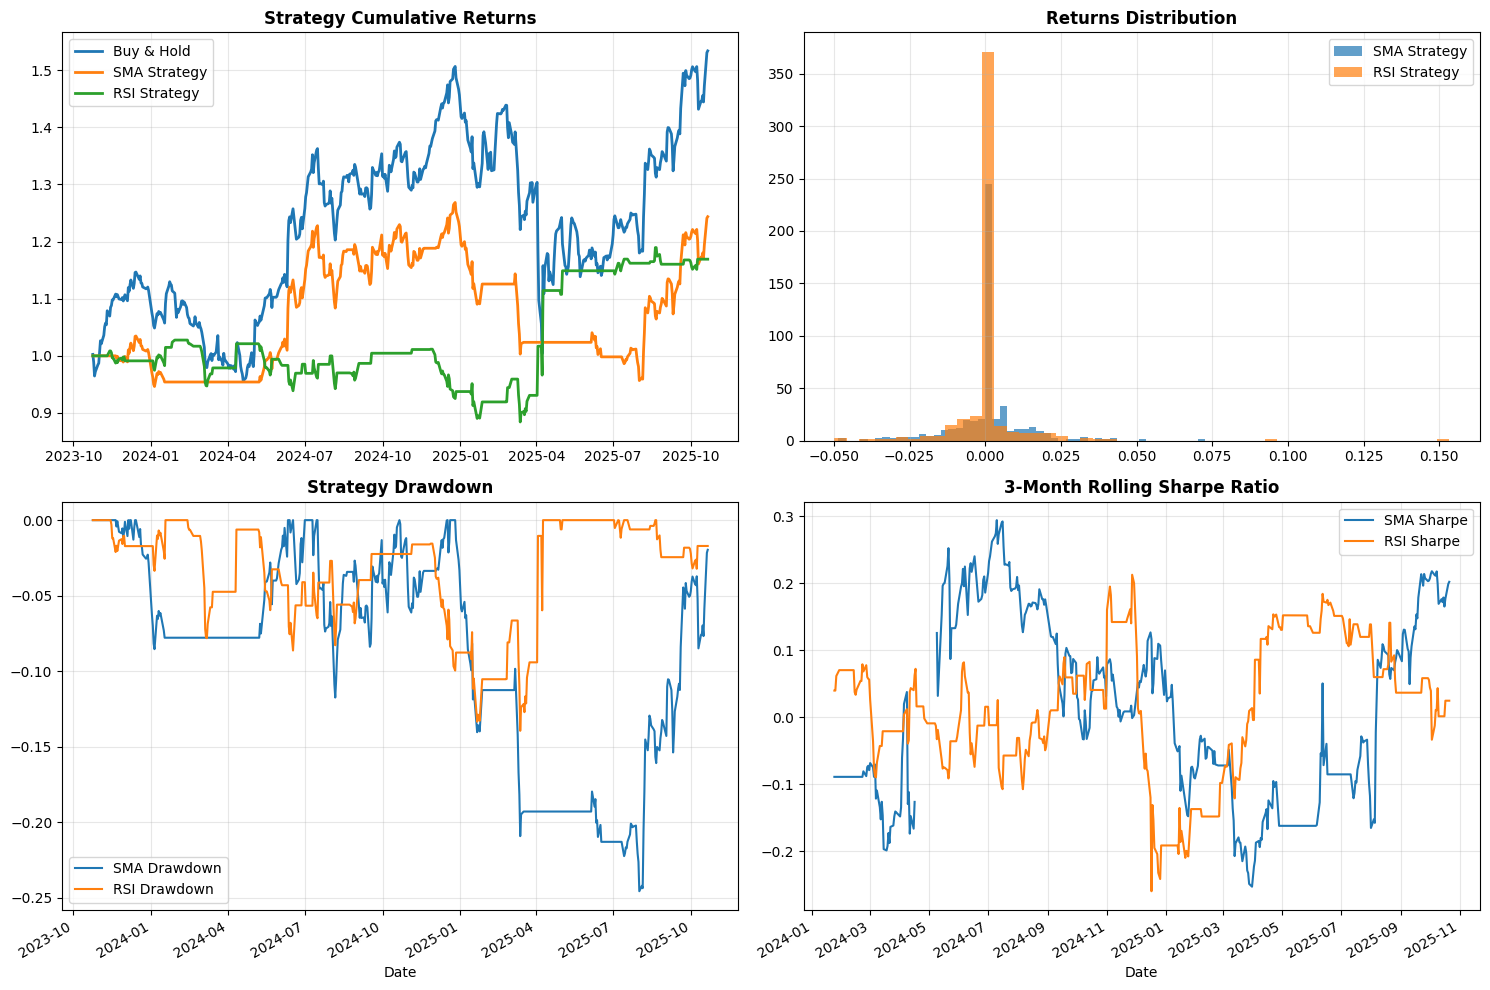

🎯 FINAL STRATEGY COMPARISON:
               Buy & Hold  SMA Strategy  RSI Strategy
Total Return       0.5338        0.2436        0.1692
Annual Return      0.2548        0.1265        0.0944
Volatility         0.2812        0.1825        0.1802
Max Drawdown      -0.3336       -0.2458       -0.1395


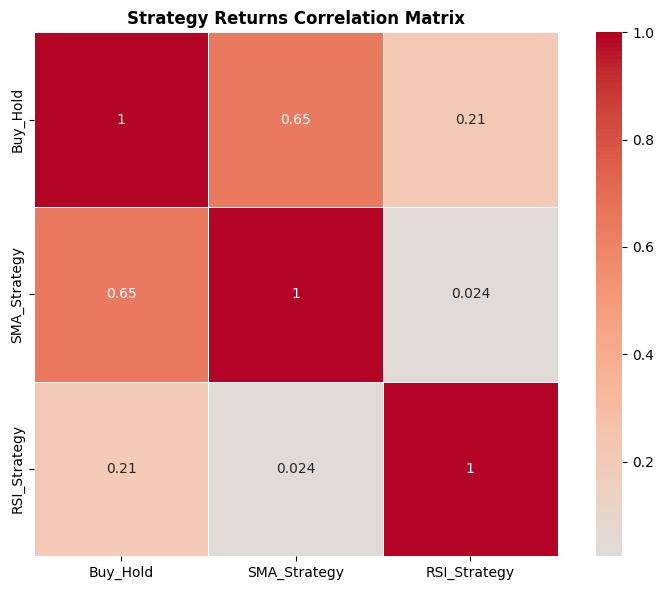


🎉 COMPLETE trading visualization.
Gunroar.



In [5]:
# %% [code]
# TASK 4: A/B TESTING VISUALIZATION
# Let's simulate two trading strategies

def simple_moving_average_strategy(prices, short_window=20, long_window=50):
    """Simple SMA crossover strategy"""
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_mavg'] = prices.rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = prices.rolling(window=long_window, min_periods=1).mean()
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(
        signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals

def rsi_momentum_strategy(prices, window=14, oversold=30, overbought=70):
    """RSI-based strategy"""
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    signals['rsi'] = 100 - (100 / (1 + rs))
    signals['signal'] = 0.0
    signals['signal'] = np.where(signals['rsi'] < oversold, 1.0,
                                np.where(signals['rsi'] > overbought, -1.0, 0.0))
    signals['positions'] = signals['signal'].diff()
    return signals

# Apply strategies to AAPL
sma_strategy = simple_moving_average_strategy(data['AAPL']['Close'])
rsi_strategy = rsi_momentum_strategy(data['AAPL']['Close'])

# Calculate returns
sma_returns = data['AAPL']['Close'].pct_change() * sma_strategy['signal'].shift(1)
rsi_returns = data['AAPL']['Close'].pct_change() * rsi_strategy['signal'].shift(1)

# Cumulative returns
sma_cumulative = (1 + sma_returns).cumprod()
rsi_cumulative = (1 + rsi_returns).cumprod()
buy_hold = (1 + data['AAPL']['Close'].pct_change()).cumprod()

# %% [code]
# STRATEGY COMPARISON VISUALIZATION
plt.figure(figsize=(15, 10))

# Cumulative returns
plt.subplot(2, 2, 1)
plt.plot(buy_hold.index, buy_hold, label='Buy & Hold', linewidth=2)
plt.plot(sma_cumulative.index, sma_cumulative, label='SMA Strategy', linewidth=2)
plt.plot(rsi_cumulative.index, rsi_cumulative, label='RSI Strategy', linewidth=2)
plt.title('Strategy Cumulative Returns', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Returns distribution
plt.subplot(2, 2, 2)
sma_returns.dropna().hist(bins=50, alpha=0.7, label='SMA Strategy')
rsi_returns.dropna().hist(bins=50, alpha=0.7, label='RSI Strategy')
plt.title('Returns Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Drawdown comparison
plt.subplot(2, 2, 3)
(sma_cumulative / sma_cumulative.expanding().max() - 1).plot(label='SMA Drawdown')
(rsi_cumulative / rsi_cumulative.expanding().max() - 1).plot(label='RSI Drawdown')
plt.title('Strategy Drawdown', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Rolling Sharpe (3-month)
plt.subplot(2, 2, 4)
sma_returns.rolling(63).mean().div(sma_returns.rolling(63).std()).plot(label='SMA Sharpe')
rsi_returns.rolling(63).mean().div(rsi_returns.rolling(63).std()).plot(label='RSI Sharpe')
plt.title('3-Month Rolling Sharpe Ratio', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [code]
# FINAL PERFORMANCE COMPARISON
final_stats = pd.DataFrame({
    'Buy & Hold': [
        buy_hold.iloc[-1] - 1,
        data['AAPL']['Close'].pct_change().mean() * 252,
        data['AAPL']['Close'].pct_change().std() * np.sqrt(252),
        (buy_hold / buy_hold.expanding().max() - 1).min()
    ],
    'SMA Strategy': [
        sma_cumulative.iloc[-1] - 1,
        sma_returns.mean() * 252,
        sma_returns.std() * np.sqrt(252),
        (sma_cumulative / sma_cumulative.expanding().max() - 1).min()
    ],
    'RSI Strategy': [
        rsi_cumulative.iloc[-1] - 1,
        rsi_returns.mean() * 252,
        rsi_returns.std() * np.sqrt(252),
        (rsi_cumulative / rsi_cumulative.expanding().max() - 1).min()
    ]
}, index=['Total Return', 'Annual Return', 'Volatility', 'Max Drawdown'])

print("🎯 FINAL STRATEGY COMPARISON:")
print(final_stats.round(4))

# %% [code]
# BONUS: QUICK CORRELATION MATRIX FOR ALL STRATEGIES
all_returns = pd.DataFrame({
    'Buy_Hold': data['AAPL']['Close'].pct_change(),
    'SMA_Strategy': sma_returns,
    'RSI_Strategy': rsi_returns
})

plt.figure(figsize=(8, 6))
sns.heatmap(all_returns.corr(), annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Strategy Returns Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.show()

print("""
🎉 COMPLETE trading visualization.
Gunroar.
""")

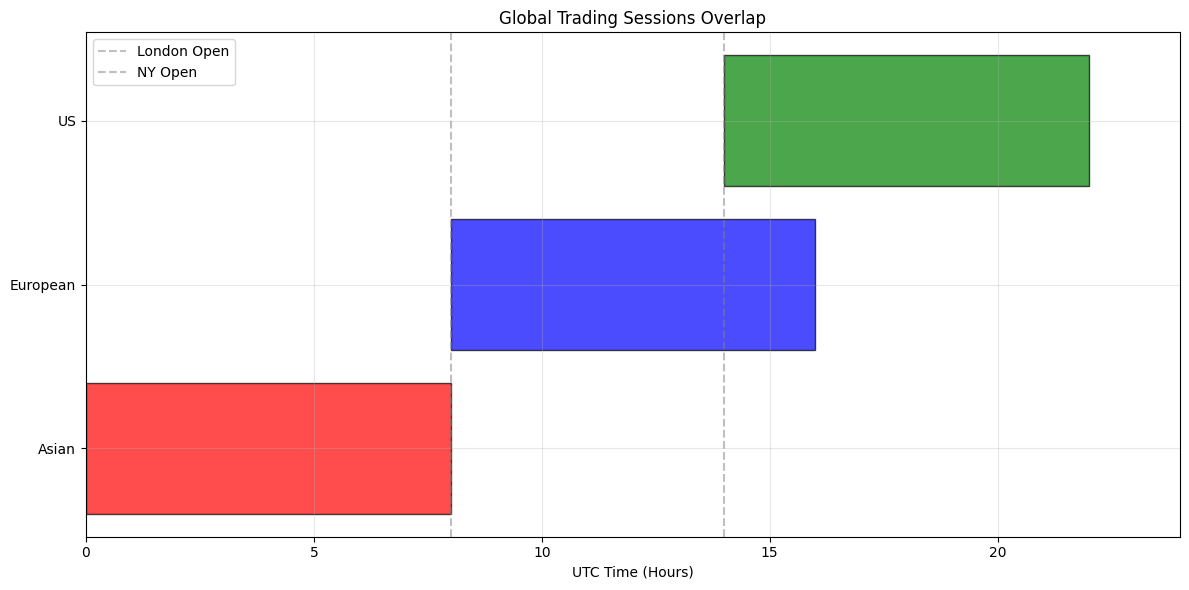

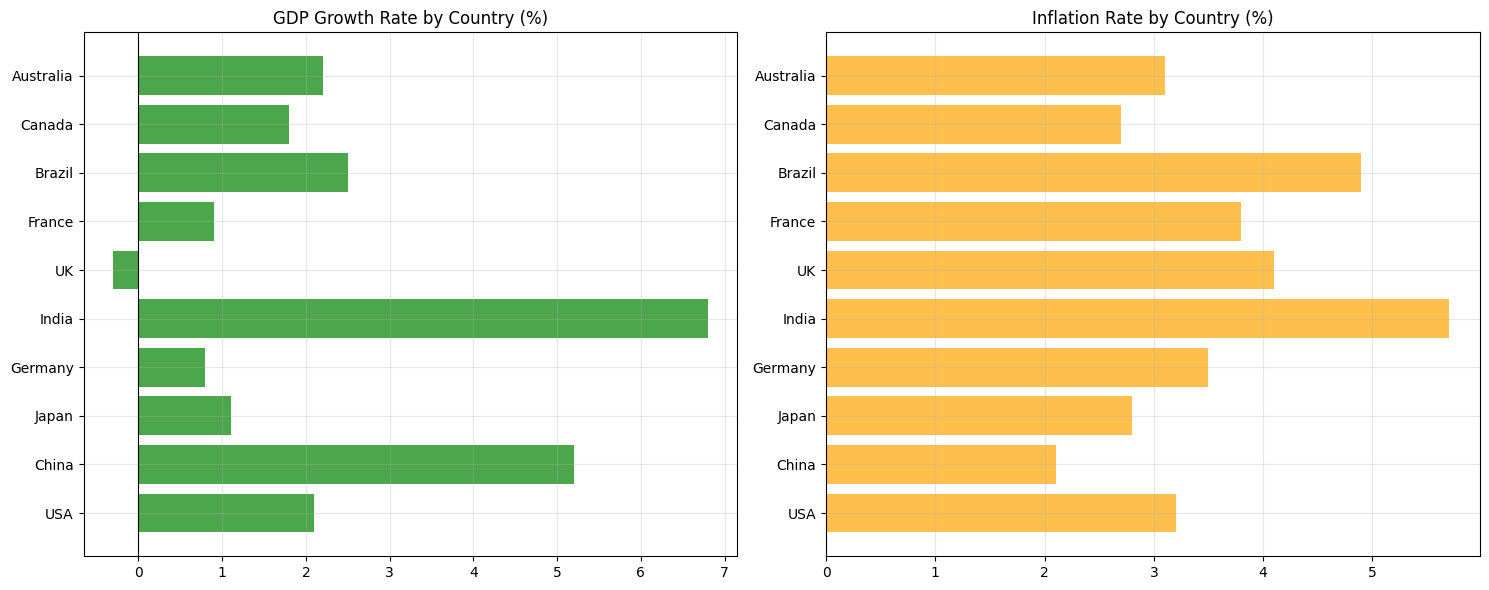

🌍 Interactive World Map Created!


In [6]:
# %% [code]
# TASK 5: GEOGRAPHIC VISUALIZATION - QUICK IMPLEMENTATION
!pip install folium geopandas -q

import folium
from folium import plugins
import geopandas as gpd

# %% [code]
# TASK 5.1: GLOBAL MARKET HEATMAP
# Sample global indices data (in real scenario, you'd fetch this)
countries_data = {
    'Country': ['USA', 'Canada', 'UK', 'Germany', 'France', 'Japan', 'China', 'Australia', 'Brazil', 'India'],
    'Code': ['USA', 'CAN', 'GBR', 'DEU', 'FRA', 'JPN', 'CHN', 'AUS', 'BRA', 'IND'],
    'Returns': [15.2, 8.7, -2.1, 12.5, 9.3, 5.8, -5.2, 11.7, -8.9, 18.4],
    'Market_Cap': [45000, 2200, 3800, 2800, 2500, 5500, 12000, 1500, 1200, 3500]
}

countries_df = pd.DataFrame(countries_data)

# Create choropleth map
fig = px.choropleth(countries_df,
                    locations="Code",
                    color="Returns",
                    hover_name="Country",
                    hover_data=["Returns", "Market_Cap"],
                    color_continuous_scale=px.colors.diverging.RdYlGn,
                    title="Global Stock Market Returns Heatmap",
                    scope="world")

fig.show()

# %% [code]
# TASK 5.2: COMPANY HEADQUARTERS MAP
# Map portfolio companies by location
portfolio_companies = {
    'Company': ['Apple', 'Tesla', 'Microsoft', 'Amazon', 'Google', 'Meta'],
    'Latitude': [37.3349, 37.3947, 47.6406, 47.6226, 37.4220, 37.4850],
    'Longitude': [-122.0090, -122.1503, -122.1297, -122.3508, -122.0840, -122.1484],
    'Market_Cap_B': [2800, 600, 2100, 1600, 1800, 900],
    'Sector': ['Technology', 'Automotive', 'Technology', 'E-commerce', 'Technology', 'Technology']
}

companies_df = pd.DataFrame(portfolio_companies)

# Create bubble map
fig = px.scatter_geo(companies_df,
                     lat='Latitude',
                     lon='Longitude',
                     size='Market_Cap_B',
                     hover_name='Company',
                     hover_data=['Sector'],
                     size_max=30,
                     title="Portfolio Companies Headquarters",
                     scope='north america')

fig.update_geos(showland=True, landcolor="lightgray")
fig.show()

# %% [code]
# TASK 5.3: TRADING HOURS VISUALIZATION
# Global market sessions
market_sessions = {
    'Market': ['Asian', 'European', 'US'],
    'Open_UTC': [0, 8, 14],  # Opening hours in UTC
    'Close_UTC': [8, 16, 22],
    'Color': ['red', 'blue', 'green']
}

sessions_df = pd.DataFrame(market_sessions)

# Create trading hours visualization
plt.figure(figsize=(12, 6))
for _, session in sessions_df.iterrows():
    plt.barh(session['Market'],
             session['Close_UTC'] - session['Open_UTC'],
             left=session['Open_UTC'],
             color=session['Color'],
             alpha=0.7,
             edgecolor='black')

plt.xlabel('UTC Time (Hours)')
plt.title('Global Trading Sessions Overlap')
plt.grid(True, alpha=0.3)
plt.xlim(0, 24)
plt.axvline(8, color='gray', linestyle='--', alpha=0.5, label='London Open')
plt.axvline(14, color='gray', linestyle='--', alpha=0.5, label='NY Open')
plt.legend()
plt.tight_layout()
plt.show()

# %% [code]
# TASK 5.4: ECONOMIC DATA VISUALIZATION
# GDP growth by country
gdp_data = {
    'Country': ['USA', 'China', 'Japan', 'Germany', 'India', 'UK', 'France', 'Brazil', 'Canada', 'Australia'],
    'GDP_Growth': [2.1, 5.2, 1.1, 0.8, 6.8, -0.3, 0.9, 2.5, 1.8, 2.2],
    'Inflation': [3.2, 2.1, 2.8, 3.5, 5.7, 4.1, 3.8, 4.9, 2.7, 3.1]
}

gdp_df = pd.DataFrame(gdp_data)

# Create economic indicators visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# GDP Growth
ax1.barh(gdp_df['Country'], gdp_df['GDP_Growth'], color='green', alpha=0.7)
ax1.set_title('GDP Growth Rate by Country (%)')
ax1.axvline(0, color='black', linewidth=0.8)
ax1.grid(True, alpha=0.3)

# Inflation
ax2.barh(gdp_df['Country'], gdp_df['Inflation'], color='orange', alpha=0.7)
ax2.set_title('Inflation Rate by Country (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [code]
# TASK 5.5: INTERACTIVE FOLIUM MAP
# Create an interactive world map with Folium
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Add markers for major financial centers
financial_centers = [
    {'name': 'New York', 'coords': [40.7128, -74.0060], 'type': 'Stock Exchange'},
    {'name': 'London', 'coords': [51.5074, -0.1278], 'type': 'Stock Exchange'},
    {'name': 'Tokyo', 'coords': [35.6762, 139.6503], 'type': 'Stock Exchange'},
    {'name': 'Hong Kong', 'coords': [22.3193, 114.1694], 'type': 'Stock Exchange'},
    {'name': 'Singapore', 'coords': [1.3521, 103.8198], 'type': 'Financial Hub'}
]

for center in financial_centers:
    folium.Marker(
        location=center['coords'],
        popup=f"{center['name']} - {center['type']}",
        tooltip=center['name'],
        icon=folium.Icon(color='red', icon='usd', prefix='fa')
    ).add_to(world_map)

# Add a heatmap layer (simulated trading activity)
import random
heat_data = [[random.uniform(-90, 90), random.uniform(-180, 180), random.random()]
             for _ in range(100)]
plugins.HeatMap(heat_data).add_to(world_map)

print("🌍 Interactive World Map Created!")
world_map